## Setup

In [1]:
import sys; sys.path.append('../' * 4)

## Libs

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from lib.plot.configure import configure_graph

from lib.plot.draw_x_points import draw_x_points
from lib.plot.draw_x_line import draw_x_line
from lib.plot.draw_y_line import draw_y_line
from lib.plot.draw_scatter import draw_scatter
from lib.plot.draw_line import draw_line

## Dataset

In [3]:
from examples.dataset.dosage import dataset

In [4]:
dataset.head()

,dosage,health
0,10.976270,good
1,14.303787,not good
2,12.055268,good
3,10.897664,good
4,8.473096,good


In [5]:
X = dataset['dosage'].values
Y = dataset['health'].values

<module 'matplotlib.pyplot' from '/home/anderson/.local/lib/python3.12/site-packages/matplotlib/pyplot.py'>

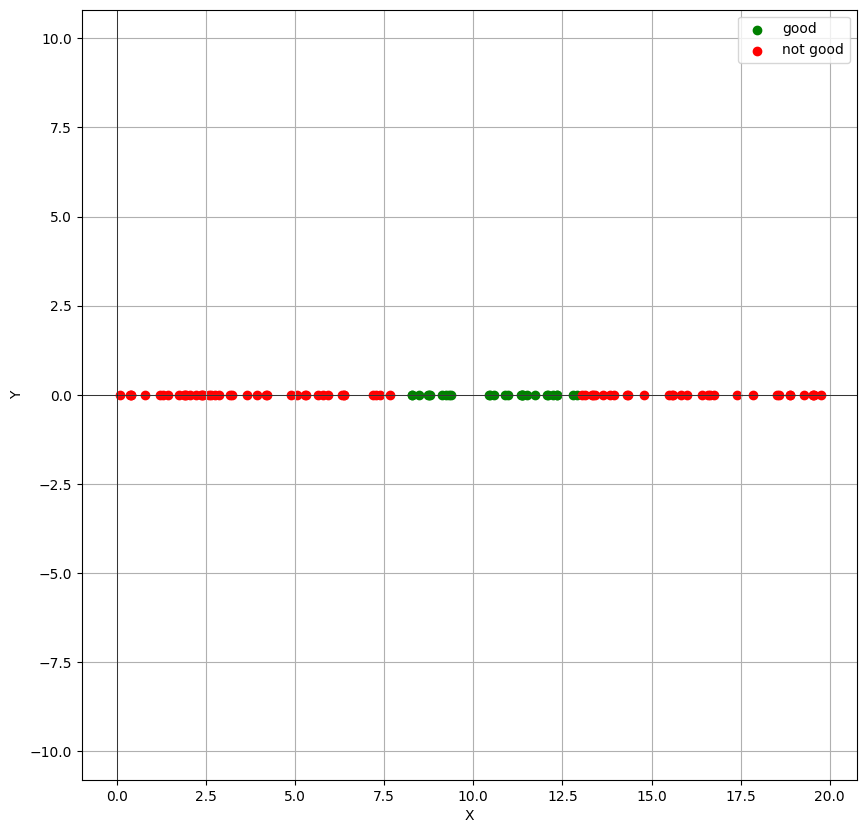

In [6]:
draw_x_points(None, X, Y, colors=['green', 'red'], labels=True)

### Dataset 2

In [7]:
from examples.dataset.height_weight import dataset as d2

In [8]:
d2.head()

,Height_cm,Weight_kg
0,174.967142,94.811815
1,168.617357,83.179797
2,176.476885,88.576084
3,185.230299,85.491408
4,167.658466,81.107320


In [9]:
_X, _Y = d2.iloc[:, 0], d2.iloc[:, 1]

In [10]:
m = np.mean(_Y)
_Y = [True if y > m else False for y in _Y]

<module 'matplotlib.pyplot' from '/home/anderson/.local/lib/python3.12/site-packages/matplotlib/pyplot.py'>

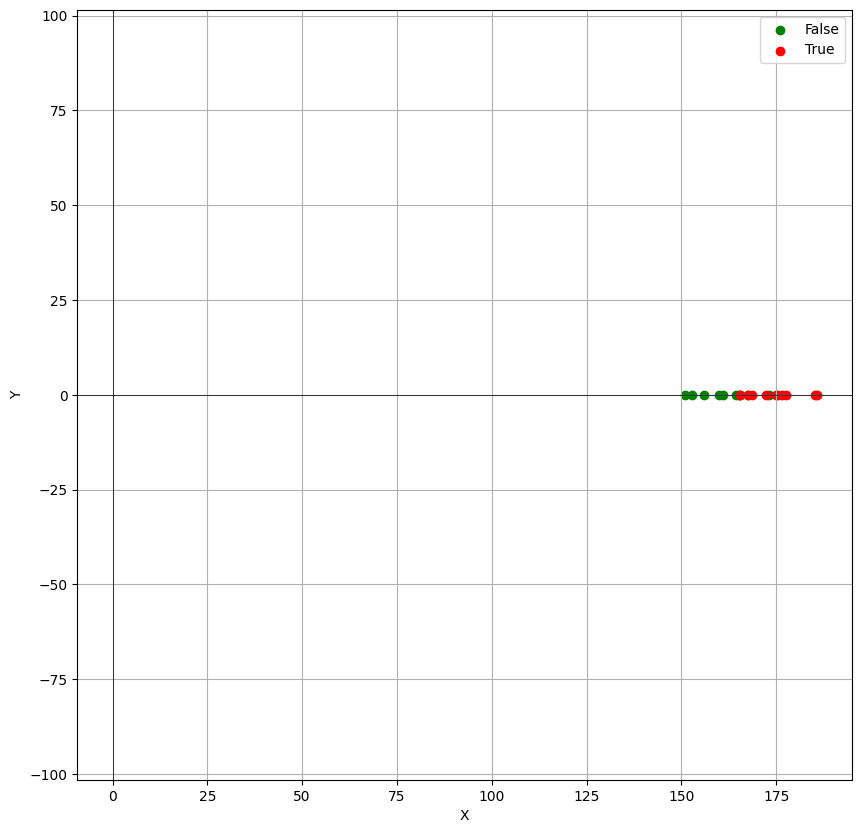

In [11]:
draw_x_points(None, _X, _Y, colors=['green', 'red'], labels=True)

In [12]:
_X = _X.values

## Using LR

### Dataset 2

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(_X.reshape(-1, 1), _Y)

LinearRegression()

<module 'matplotlib.pyplot' from '/home/anderson/.local/lib/python3.12/site-packages/matplotlib/pyplot.py'>

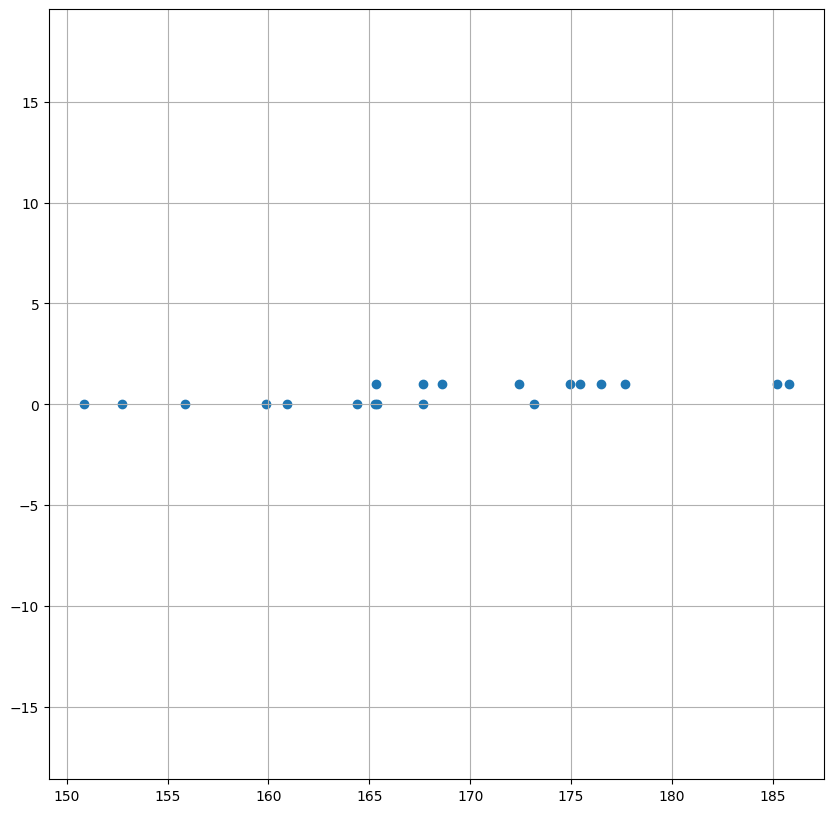

In [14]:
p = configure_graph(center_zero=False)
draw_scatter(p, _X, _Y)

In [15]:
model.coef_, model.intercept_

(array([0.03810913]), -5.913272461830338)

<module 'matplotlib.pyplot' from '/home/anderson/.local/lib/python3.12/site-packages/matplotlib/pyplot.py'>

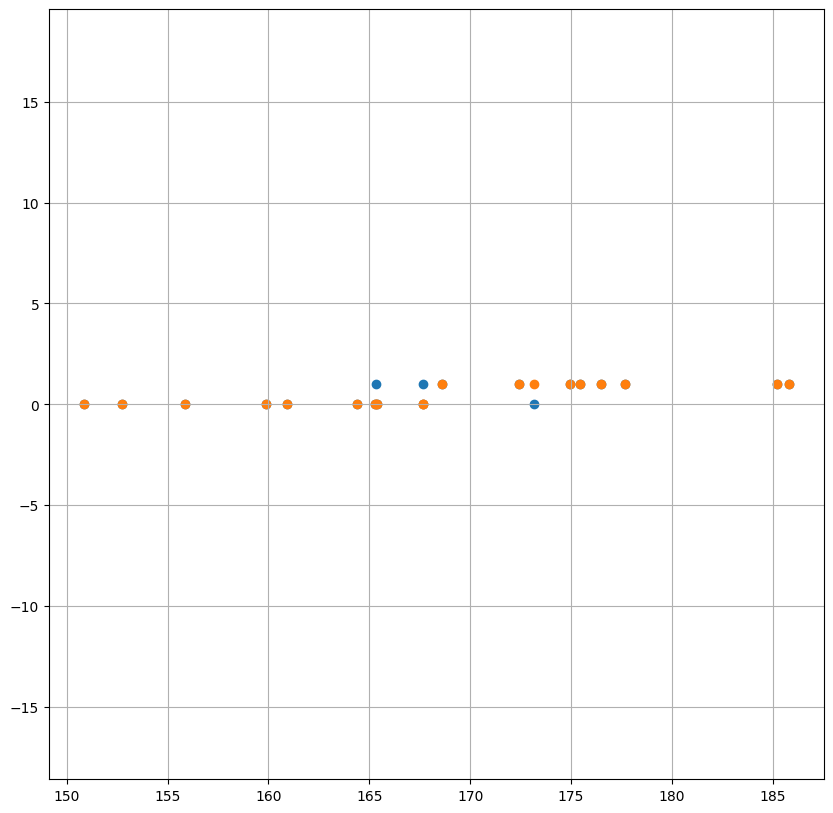

In [16]:
# Threshold
from lib.activation.Threshold import Threshold

a = Threshold(0.5)

p = configure_graph(center_zero=False)
draw_scatter(p, _X, _Y)
draw_scatter(p, _X, [a.apply(model.coef_[0] * x + model.intercept_) for x in _X])

<module 'matplotlib.pyplot' from '/home/anderson/.local/lib/python3.12/site-packages/matplotlib/pyplot.py'>

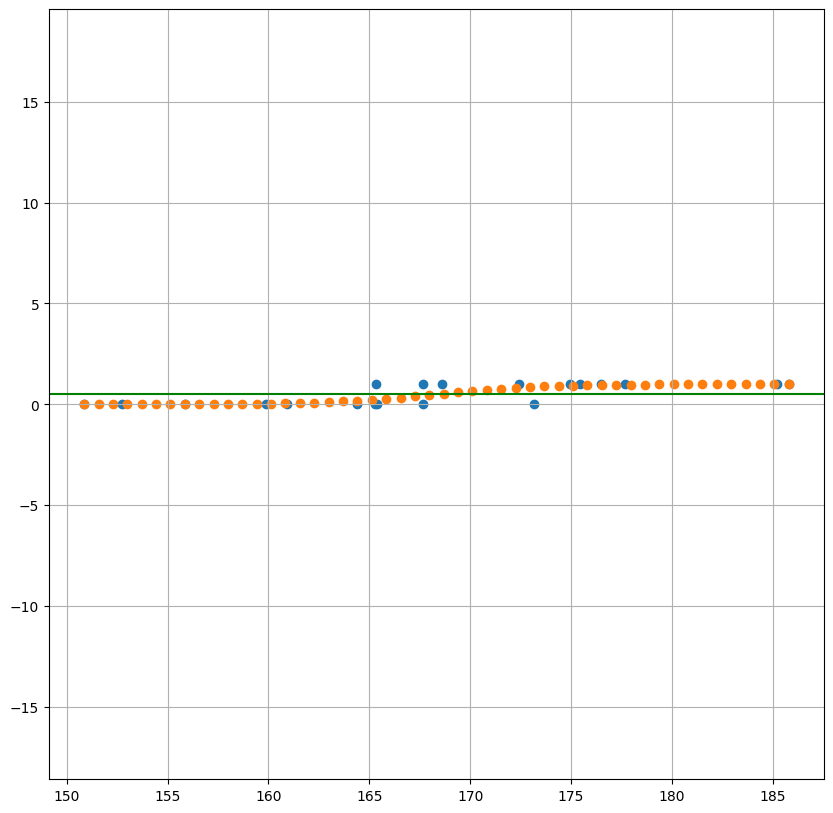

In [17]:
# Sigmoid
from lib.activation.Sigmoid import Sigmoid

a = Sigmoid()
rng = np.linspace(_X.min(), _X.max(), 50)

p = configure_graph(center_zero=False)
draw_scatter(p, _X, _Y)
draw_scatter(p, rng, [a.apply((model.coef_[0] * x + model.intercept_ - 0.5) * 10) for x in rng])

draw_y_line(p, 0.5, 'green', label='Threshold')

In [18]:
split_point = (0.5 - model.intercept_) / model.coef_[0]

<module 'matplotlib.pyplot' from '/home/anderson/.local/lib/python3.12/site-packages/matplotlib/pyplot.py'>

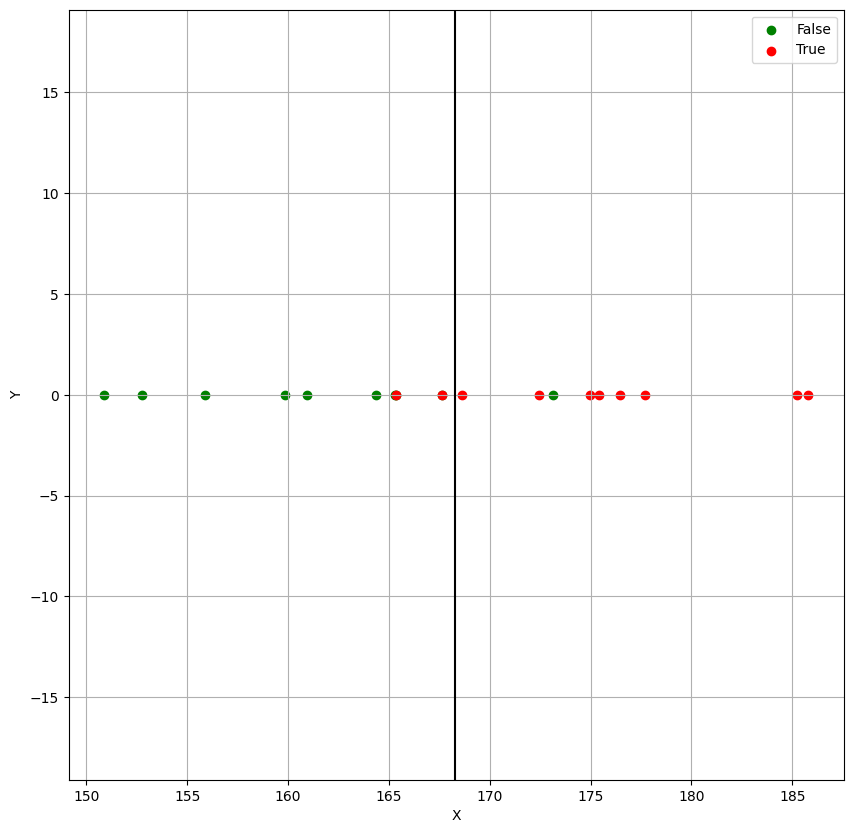

In [19]:
p = configure_graph(center_zero=False)
draw_x_points(p, _X, _Y, colors=['green', 'red'], labels=True)
draw_x_line(p, split_point)

### Dataset 1

In [20]:
bY = [True if y == 'good' else False for y in Y]

In [21]:
model2 = LinearRegression()
model2.fit(X.reshape(-1, 1), bY)

LinearRegression()

/home/anderson/Documents/repo/ai-student/6-lib-study-method/1_ml/2_svm/2_classification/2_svm_kernel/../../../../lib/plot/draw_axis_points.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  p.legend()


<module 'matplotlib.pyplot' from '/home/anderson/.local/lib/python3.12/site-packages/matplotlib/pyplot.py'>

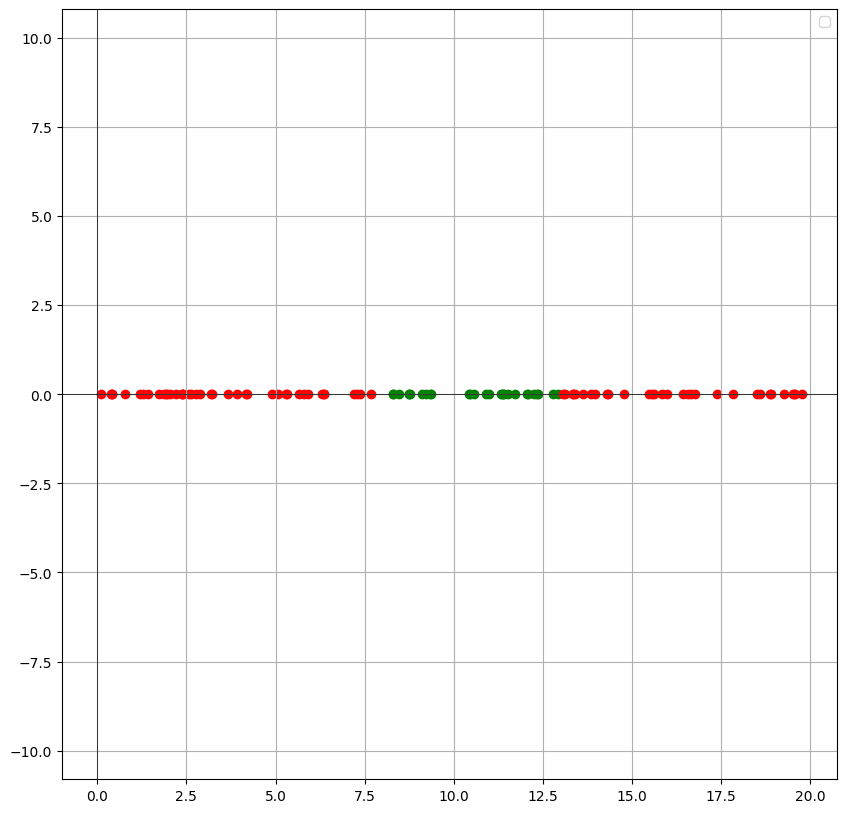

In [22]:
draw_x_points(None, X, Y, ['green', 'red'])

<module 'matplotlib.pyplot' from '/home/anderson/.local/lib/python3.12/site-packages/matplotlib/pyplot.py'>

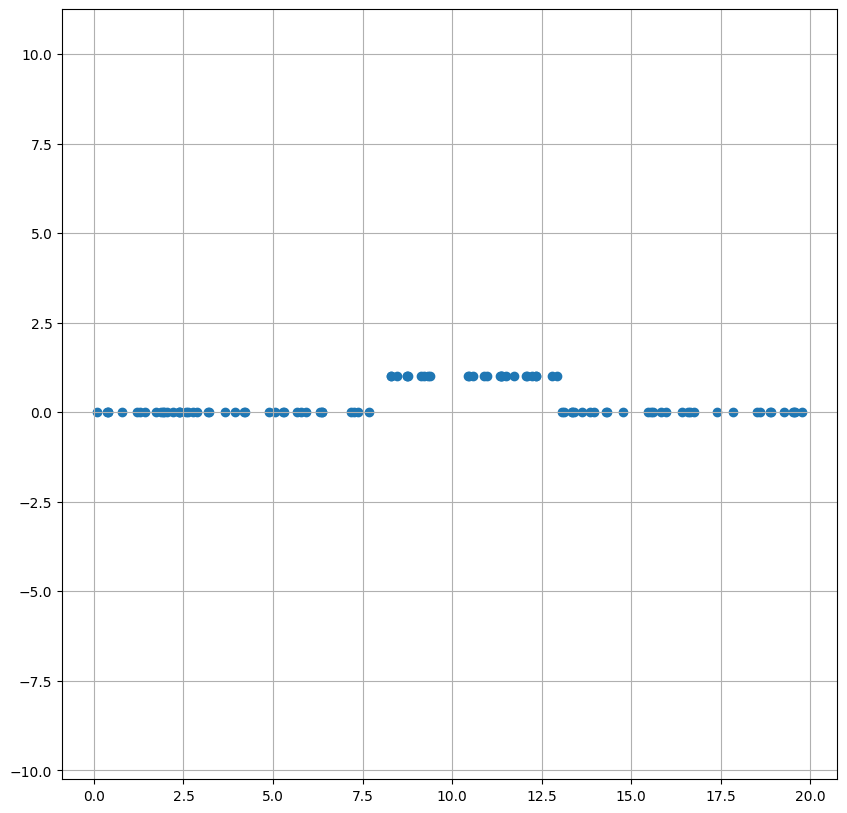

In [23]:
p = configure_graph(center_zero=False)
draw_scatter(p, X, bY)

In [24]:
model2.coef_, model2.intercept_

(array([0.00976733]), 0.1876413477943903)

<module 'matplotlib.pyplot' from '/home/anderson/.local/lib/python3.12/site-packages/matplotlib/pyplot.py'>

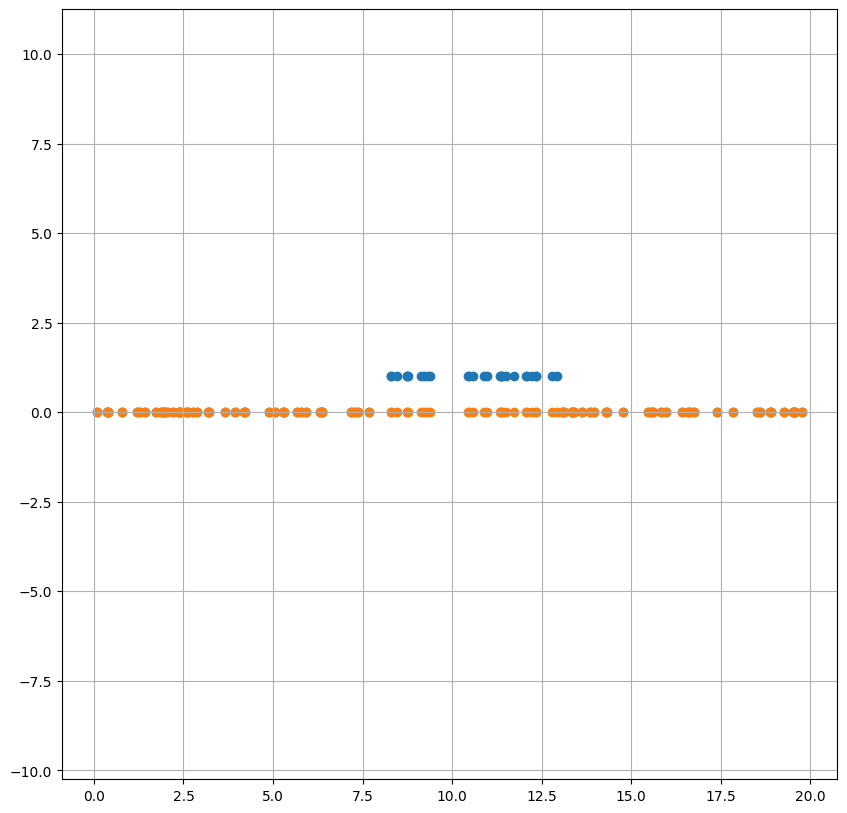

In [25]:
# Threshold
from lib.activation.Threshold import Threshold

a = Threshold(0.5)

p = configure_graph(center_zero=False)
draw_scatter(p, X, bY)
draw_scatter(p, X, [a.apply(model2.coef_[0] * x + model2.intercept_) for x in X])

<module 'matplotlib.pyplot' from '/home/anderson/.local/lib/python3.12/site-packages/matplotlib/pyplot.py'>

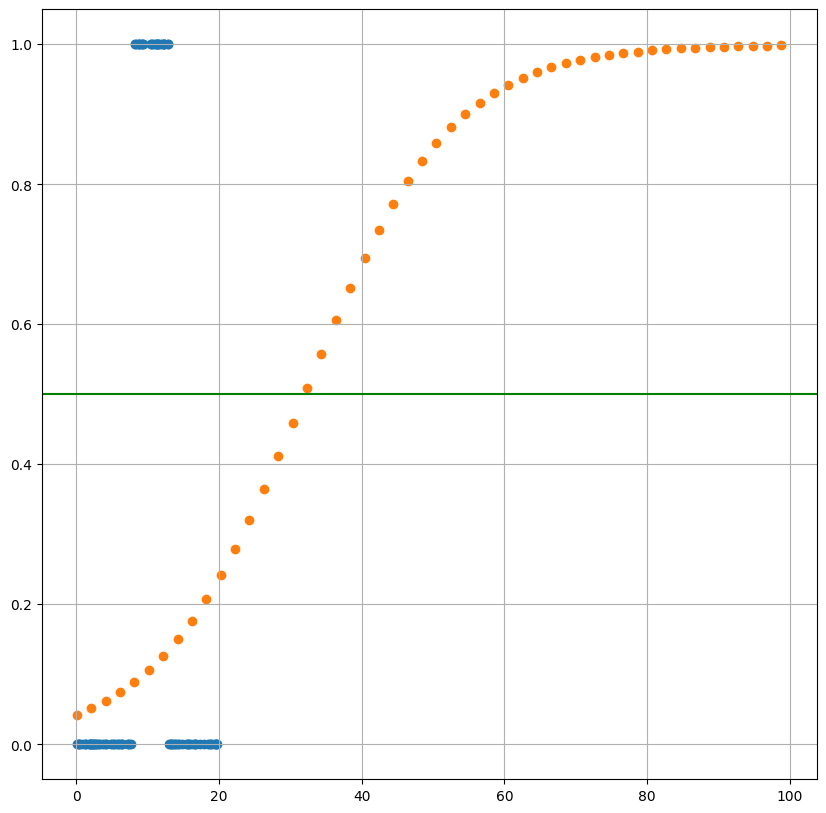

In [26]:
# Sigmoid
from lib.activation.Sigmoid import Sigmoid

a = Sigmoid()
rng = np.linspace(X.min(), X.max() * 5, 50)

p = configure_graph(center_zero=False, equal_axis=False)
draw_scatter(p, X, bY)
draw_scatter(p, rng, [a.apply((model2.coef_[0] * x + model2.intercept_ - 0.5) * 10) for x in rng])

draw_y_line(p, 0.5, 'green', label='Threshold')

In [27]:
split_point2 = (0.5 - model2.intercept_) / model2.coef_[0]

<module 'matplotlib.pyplot' from '/home/anderson/.local/lib/python3.12/site-packages/matplotlib/pyplot.py'>

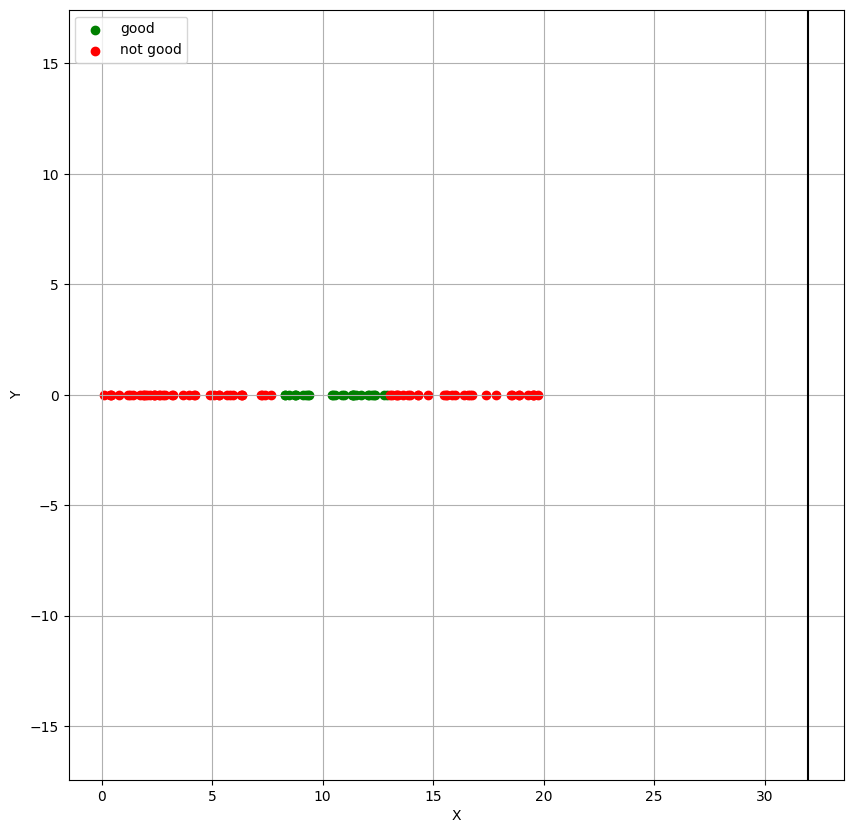

In [28]:
p = configure_graph(center_zero=False)
draw_x_points(p, X, Y, colors=['green', 'red'], labels=True)
draw_x_line(p, split_point2)

## Support Vector machines (Poly Kernel)

In [29]:
from sklearn.svm import SVC

In [30]:
model = SVC(kernel='poly', degree=2, coef0=1, C=1.0)
model.fit(X.reshape(-1, 1), bY)

SVC(coef0=1, degree=2, kernel='poly')

<module 'matplotlib.pyplot' from '/home/anderson/.local/lib/python3.12/site-packages/matplotlib/pyplot.py'>

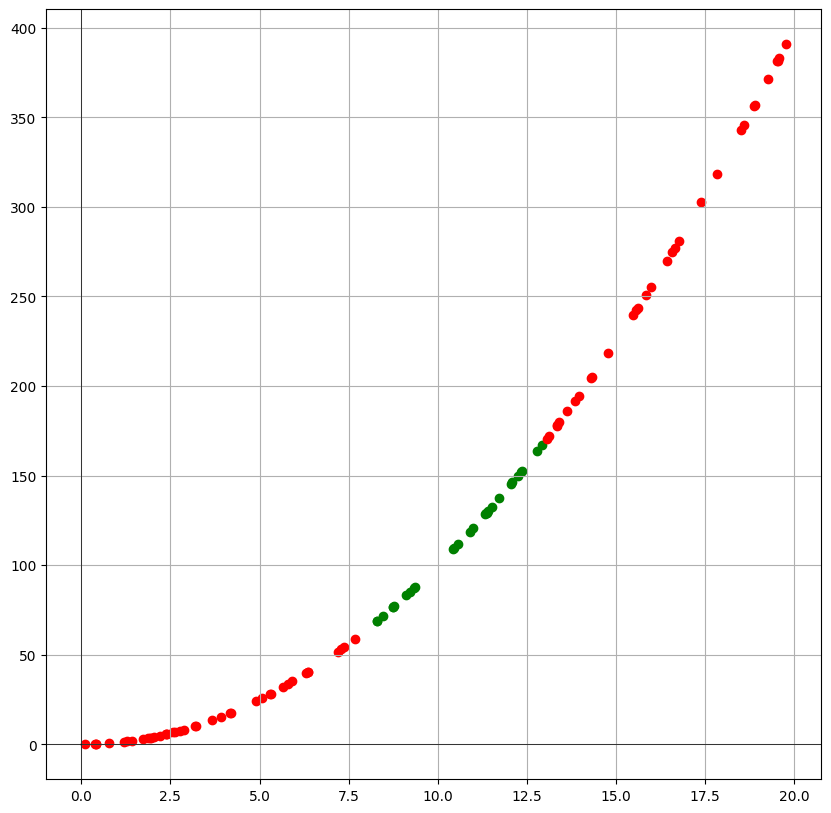

In [31]:
draw_scatter(configure_graph(equal_axis=False), X, (X ** 2).tolist(), Y, ['green', 'red'])

In [32]:
model.dual_coef_

array([[-1.        , -1.        , -1.        , -0.65660091, -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -0.34339909, -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ]])

In [33]:
model.decision_function([[6.3036]])

array([-5.92543411e-06])

In [34]:
model.decision_function([[13.514]])

array([0.00022366])

In [35]:
lx = np.array([6.3036, 13.514])
ly = lx ** 2

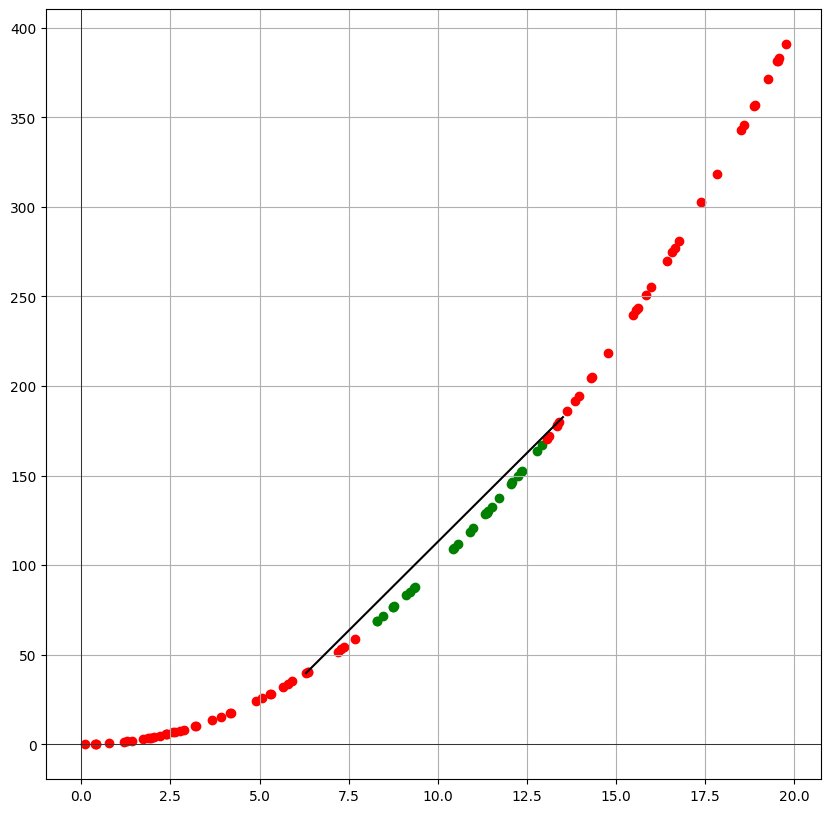

In [36]:
p = draw_scatter(configure_graph(equal_axis=False), X, (X ** 2).tolist(), Y, ['green', 'red'])
p.plot(lx, ly, color='black')

In [37]:
from lib.plot.draw_circle import draw_circle

<module 'matplotlib.pyplot' from '/home/anderson/.local/lib/python3.12/site-packages/matplotlib/pyplot.py'>

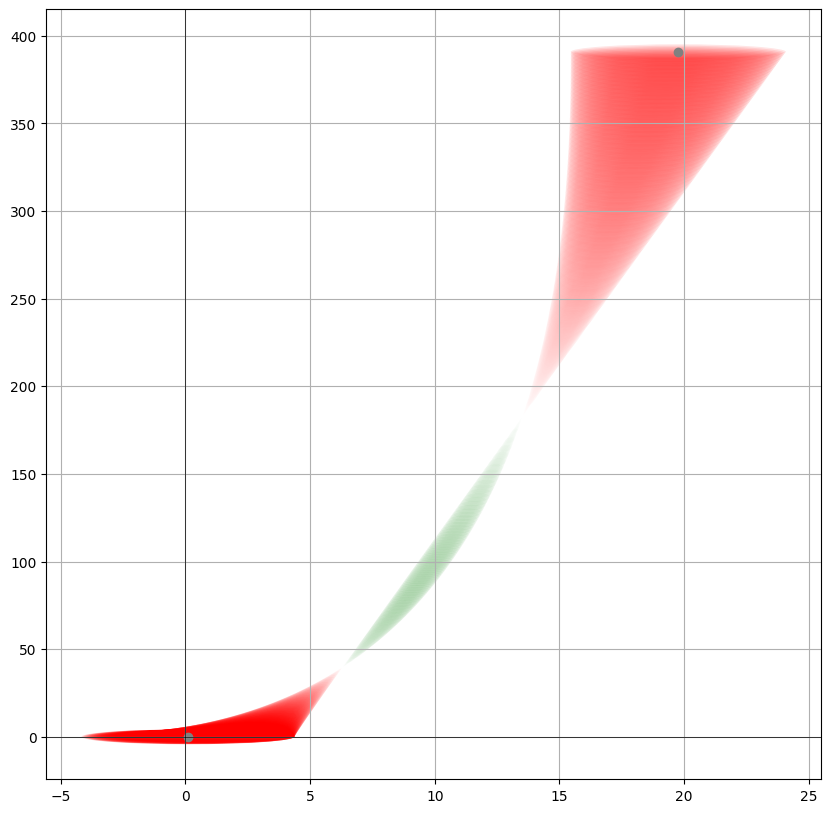

In [39]:
p = configure_graph(equal_axis=False)

for x in np.linspace(X.min(), X.max(), 1000):
  b = model.decision_function([[x]])[0]
  p = draw_circle(p, x, x**2, abs(b), 'red' if b < 0 else 'green', 0.1, edge_color=None)

p = draw_scatter(p, [X.min(), X.max()], [(X ** 2).min(), (X ** 2).max()], [0, 0], ['gray'])
p